<h1 style = "color : Sky blue"> Plotting Exercise(Numpy Attributes)</h1>

As you learnt in the session, data visualisation is an essential skill for a data scientist to have. Charts and graphs are the easiest way to communicate data to different kinds of consumers. The assessments in this notebook will test your ability to represent information. The questions will be investigative and will not have detailed instructions about the execution; you will have to figure that part out yourself. Don't worry, there are no wrong answers here, only happy accidents. Try these questions on your own, to verify if you have done the task correctly, look at the solution as a person who does not know the data and is looking at it for the first time. You will be able to identify better ways to represent data automatically.  

The dataset given for this notebook is the pricing data for diamonds based on the carat, cut, colour and so on. Take a look at the data below and also the data dictionary for a better understanding of the data and the attributes. 

In [9]:
# Import the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# Read the data into a dataframe
data = pd.read_csv("diamonds.csv", header = 0)

# As a preparatory step, let's drop Unnamed column.
data = data.drop("Unnamed: 0", axis =1 )

data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### Data Dictionary: 

1. **carat**: Weight of the diamond (0.2--5.01)

2.  **cut**: Quality of the cut (Fair, Good, Very Good, Premium, Ideal)

3. **color**: Diamond colour, from J (worst) to D (best)

4. **clarity**: A measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

5. **depth**: Total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

6. **table**: Width of top of diamond relative to widest point (43--95)

7. **price**: Price in US dollars (326 dollars -18,823 dollars)

8. **x**: Length in mm (0--10.74)

9. **y**: Width in mm (0--58.9)

10. **z**: Depth in mm (0--31.8)

<h3 style = "color : Brown"> Question </h3>

Investigate the variation of prices of diamonds and note your observations. 

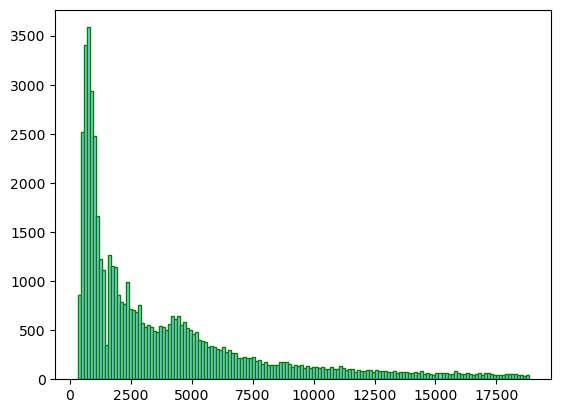

In [59]:
plt.hist(data['price'],bins = 150, color = 'skyblue',edgecolor = 'green')
plt.show()

Most of the diamonds lie in the range of 0 to 5000

In [11]:
data['volume'] = data['x'] * data['y'] * data['z']
data['volume']

0         38.202030
1         34.505856
2         38.076885
3         46.724580
4         51.917250
            ...    
53935    115.920000
53936    118.110175
53937    114.449728
53938    140.766120
53939    124.568444
Name: volume, Length: 53940, dtype: float64

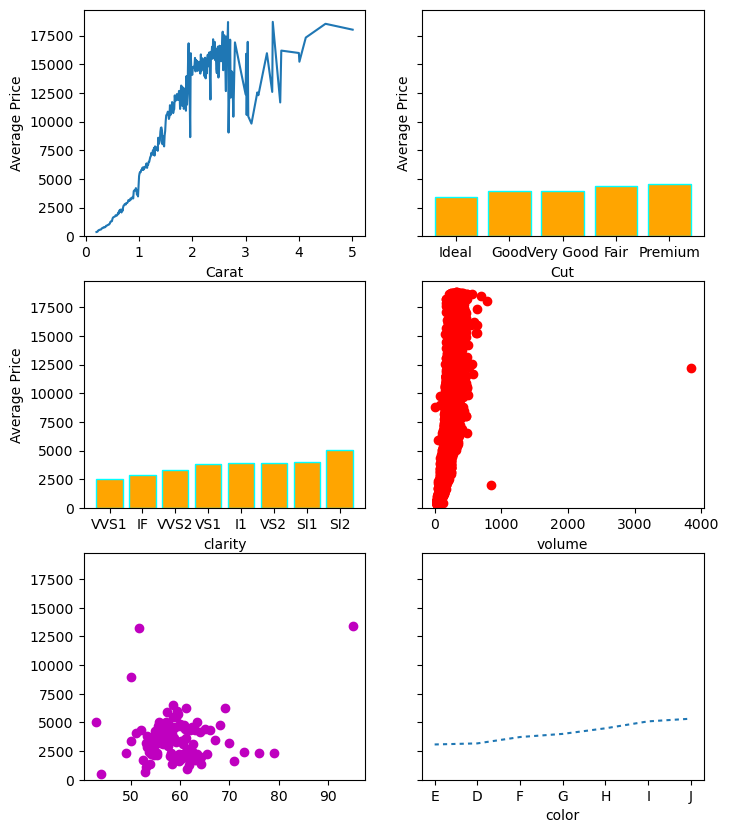

In [12]:
fig, axes = plt.subplots(nrows=3,ncols=2,sharey= True)
ax1,ax2,ax3,ax4,ax5,ax6 = axes.flatten()
df1 = data.groupby(['carat']).agg({'price' : 'mean'})
df1.reset_index(inplace = True)
ax1.plot(df1['carat'],df1['price'])

ax1.set_xlabel('Carat')
ax1.set_ylabel('Average Price')


df2 = data.groupby(['cut']).agg({'price' : 'mean'})
df2.reset_index(inplace = True)
df2.sort_values(by = 'price',inplace = True)
ax2.bar(df2['cut'],df2['price'],color = 'orange',edgecolor = 'cyan')

ax2.set_xlabel('Cut')
ax2.set_autoscalex_on(True)
ax2.set_ylabel('Average Price')


df3 = data.groupby(['clarity']).agg({'price' : 'mean'})
df3.reset_index(inplace = True)
df3.sort_values(by = 'price',inplace = True)
ax3.bar(df3['clarity'],df3['price'],color = 'orange',edgecolor = 'cyan')

ax3.set_xlabel('clarity')
ax3.set_ylabel('Average Price')
ax3.set_autoscalex_on(True)


df4 = data.groupby(['volume']).agg({'price' : 'mean'})
df4.reset_index(inplace = True)
df4.sort_values(by = 'price',inplace = True)
ax4.plot(df4['volume'],df4['price'],'or')

ax4.set_xlabel('volume')
ax3.set_autoscalex_on(True)




df5 = data.groupby(['table']).agg({'price' : 'mean'})
df5.reset_index(inplace = True)
df5.sort_values(by = 'price',inplace = True)
ax5.plot(df5['table'],df5['price'],'om')
ax5.set_autoscalex_on(True)


df6 = data.groupby(['color']).agg({'price' : 'mean'})
df6.reset_index(inplace = True)
df6.sort_values(by = 'price',inplace = True)
diamond_color, = ax6.plot(df6['color'],df6['price'])
diamond_color.set_dashes([2,2,2,2])


ax6.set_xlabel('color')
ax3.set_autoscalex_on(True)


fig.set_figheight(10)
fig.set_figwidth(8)

fig.savefig('diamond_price_variation.png')


<p>Action Item clarity X Cut can be a thing</p>

<h3 style = "color : Brown"> Question </h3>

Perform a similar variation analysis on the quality of cut. 

In [23]:
df_cut = data.groupby('cut').agg({'price' : 'mean','carat' : 'count'})
df_cut.reset_index(inplace = True)
df_cut

,cut,price,carat
0,Fair,4358.757764,1610
1,Good,3928.864452,4906
2,Ideal,3457.541970,21551
3,Premium,4584.257704,13791
4,Very Good,3981.759891,12082


In [28]:
df_cut.rename(columns = {'carat':'count'},inplace = True)

In [24]:
print(df_cut)

         cut        price  carat
0       Fair  4358.757764   1610
1       Good  3928.864452   4906
2      Ideal  3457.541970  21551
3    Premium  4584.257704  13791
4  Very Good  3981.759891  12082


In [25]:
df_cut.sort_values(by = 'price',inplace = True)

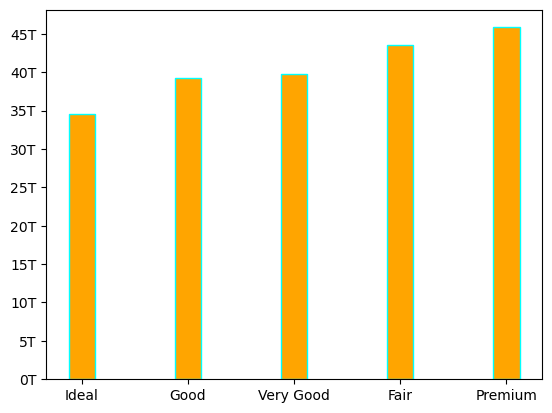

In [26]:
fig, ax = plt.subplots()
ax.bar(df_cut['cut'],df_cut['price'],edgecolor = "cyan",width= 0.25,color = 'orange')
ax.set_yticks(range(0, int(np.max(df_cut['price'])) , 500) ,   [ f'{round(y/100)}T' for y in  range( 0, int(np.max(df_cut['price'])) , 500)]  )
plt.show()

<h3 style = "color : Brown"> Question </h3>

Represent the same information as above in a pie chart.

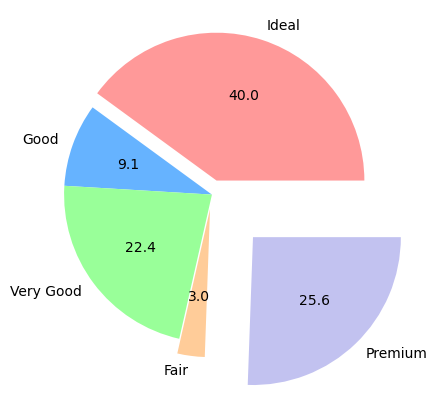

In [33]:
fig, ax = plt.subplots()
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']  # 5 custom colors
explode = (0.1, 0, 0,0.1, 0.4)  # 'explode' to highlight the first slice
ax.pie(df_cut['count'],labels = df_cut['cut'],autopct='%1.01f',colors = colors,explode = explode)
plt.show()

<h3 style = "color : Brown"> Question </h3>

Investigate the variation of price of the diamonds, with respect to the carats. 

In [36]:
df_carats = data.groupby(['carat','cut']).agg({'price':'mean'})
df_carats.reset_index(inplace = True)


In [39]:
cut = df_carats['cut'].unique()

In [40]:
cut

array(['Ideal', 'Premium', 'Very Good', 'Fair', 'Good'], dtype=object)

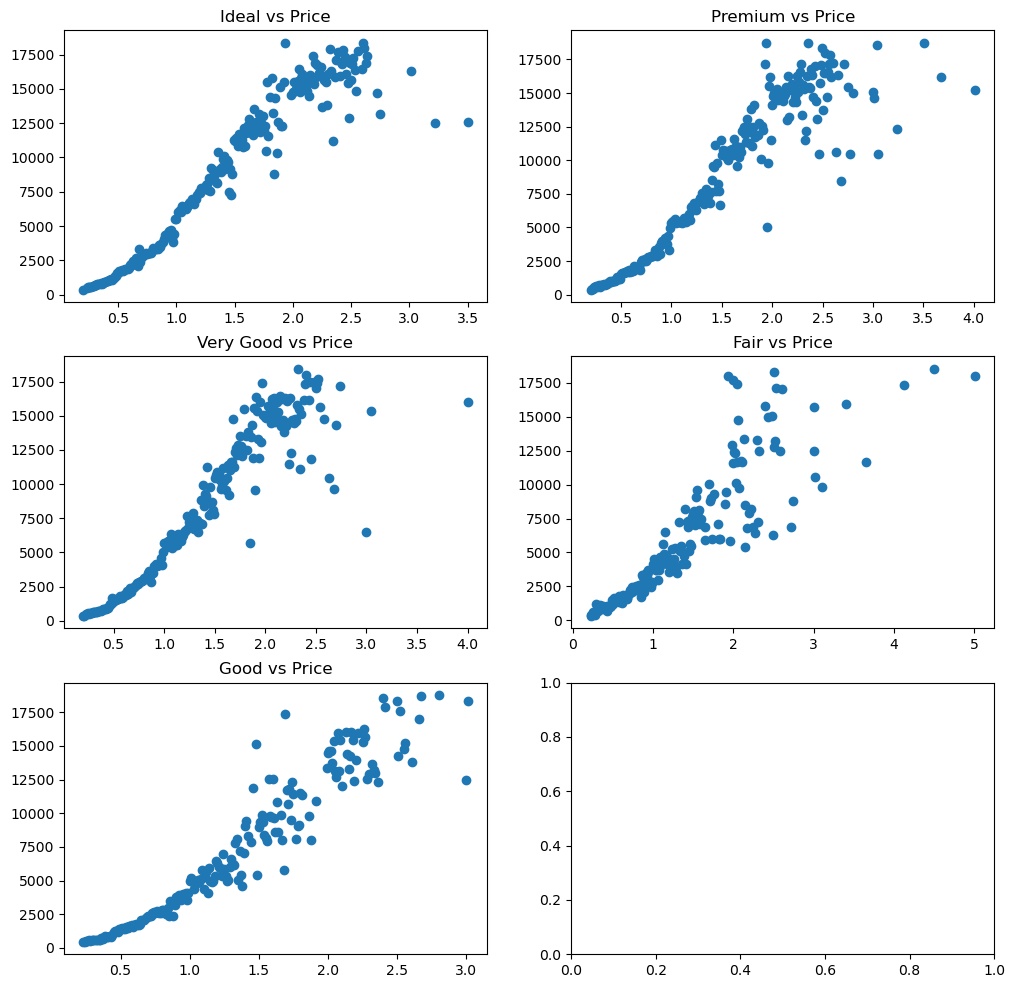

In [53]:
fig, axes = plt.subplots(nrows=3,ncols=2)
for i in range(len(cut)) : 
    axes[int(i/2)][i%2].plot(df_carats[df_carats['cut'] == cut[i]]['carat'],df_carats[df_carats['cut'] == cut[i]]['price'],'o')
    axes[int(i/2)][i%2].set_title(f"{cut[i]} vs Price")
fig.set_figwidth(12)
fig.set_figheight(12)
fig.savefig("Scatter Plot of carat vs Price")
plt.show()
   

<h3 style = "color : Brown"> Question </h3>

Investigate the relationship of price with respect to the cut of the diamonds. 

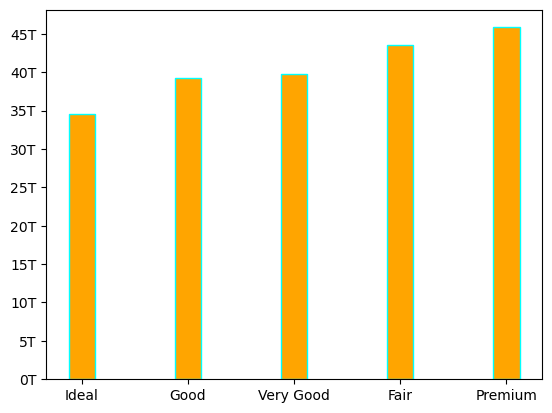

In [60]:
fig, ax = plt.subplots()
ax.bar(df_cut['cut'],df_cut['price'],edgecolor = "cyan",width= 0.25,color = 'orange')
ax.set_yticks(range(0, int(np.max(df_cut['price'])) , 500) ,   [ f'{round(y/100)}T' for y in  range( 0, int(np.max(df_cut['price'])) , 500)]  )
plt.show()


**All the best!**